In [11]:
import os
import random
import sys
import datetime

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from scipy.stats import randint as sp_randint
from sklearn.metrics import precision_score
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [12]:


X= np.load('X_cleaned_attempt_new.npy',allow_pickle=True)
Y= np.load('Y_cleaned_attempt_new.npy', allow_pickle=True)
feature_map = {'Rock':0,'Electronic':1,'Experimental':2,'Hip-Hop':3,'Folk':4,'Instrumental':5,'Pop':6,
              'International':7,'Classical':8,'Old-Time / Historic':9, 'Jazz':10,'Country':11,'Soul-RnB':12,
              'Spoken':13,'Blues':14,'Easy Listening':15}
for i in range(Y.shape[0]):
    Y[i] = float(feature_map[Y[i]])
Y[i] = np.asarray(Y[i]).astype('float32')


In [13]:
print(Y.shape)
print(X.shape)

(9349,)
(9349, 520)


In [18]:
X_test=np.load('X_test.npy')
Y_test=np.load('Y_test.npy', allow_pickle=True)
X_test = np.asarray(X_test).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')

In [15]:
print(X_test.shape, Y_test.shape)

(40249, 520) (40249,)


In [17]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X = np.asarray(X).astype('float32')
Y = np.asarray(Y).astype('float32')

In [22]:
#for i in range(2,10):
from sklearn.metrics import accuracy_score
y_pred = cross_val_predict(LogisticRegression(),X, Y, cv=5)
print(metrics.classification_report(Y, y_pred))
print(accuracy_score(Y,y_pred))#,normalize=False))
print(metrics.confusion_matrix(Y, y_pred))
print(precision_score(Y,y_pred,average='micro')) #micro Calculates metrics globally by counting the total true positives, false negatives and false positives.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

              precision    recall  f1-score   support

         0.0       0.55      0.56      0.56      1001
         1.0       0.45      0.43      0.44      1001
         2.0       0.39      0.40      0.39      1001
         3.0       0.59      0.63      0.61      1001
         4.0       0.50      0.50      0.50      1001
         5.0       0.35      0.37      0.36      1001
         6.0       0.21      0.18      0.19      1001
         7.0       0.45      0.44      0.45       695
         8.0       0.72      0.68      0.70       616
         9.0       0.88      0.88      0.88       278
        10.0       0.28      0.34      0.31       286
        11.0       0.14      0.14      0.14        98
        12.0       0.09      0.07      0.08        88
        13.0       0.35      0.38      0.36       212
        14.0       0.03      0.04      0.03        56
        15.0       0.00      0.00      0.00        13

    accuracy                           0.45      9349
   macro avg       0.37   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

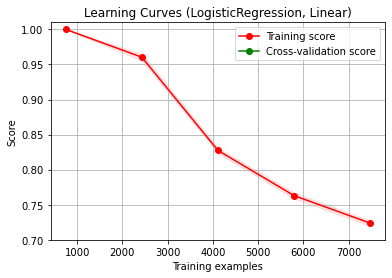

In [38]:
title = "Learning Curves (LogisticRegression, Linear)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
model = LogisticRegression()
plot_learning_curve(model, title, X, Y, (0.7, 1.01), cv=cv, n_jobs=4)

In [32]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X,Y)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.5057234415727476


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
model = SVC(gamma=1e-05, C = 1000000.0)
model = SVC(gamma=0.001, C = 100.0)
y_pred = cross_val_predict(model, X, Y, cv=5)
print(metrics.classification_report(Y, y_pred))
print(metrics.confusion_matrix(Y, y_pred))
print(accuracy_score(Y,y_pred))#,normalize=False))

              precision    recall  f1-score   support

         0.0       0.51      0.61      0.56      1001
         1.0       0.43      0.51      0.47      1001
         2.0       0.38      0.48      0.42      1001
         3.0       0.61      0.63      0.62      1001
         4.0       0.51      0.54      0.53      1001
         5.0       0.38      0.39      0.39      1001
         6.0       0.26      0.20      0.22      1001
         7.0       0.56      0.44      0.49       695
         8.0       0.81      0.71      0.75       616
         9.0       0.93      0.92      0.92       278
        10.0       0.42      0.30      0.35       286
        11.0       0.34      0.13      0.19        98
        12.0       0.35      0.10      0.16        88
        13.0       0.43      0.35      0.39       212
        14.0       0.17      0.02      0.03        56
        15.0       0.00      0.00      0.00        13

    accuracy                           0.49      9349
   macro avg       0.44   

In [30]:

# create and fit a ridge regression model, testing each alpha
model = SVC()

C_range = np.logspace(0, 7, 13)
gamma_range = np.logspace(-8, 3, 13)

# print (C_range)
# print (gamma_range)

# specify parameters and distributions to sample from
param_dist = {"gamma": gamma_range,
              "C": C_range}

#grid = GridSearchCV(estimator=model, param_grid=param_dist)
# run randomized search
n_iter_search = 10
random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=3)

random_search.fit(X, Y)

# summarize the results of the random search
print(random_search.best_score_)
print(random_search.best_estimator_.gamma)
print(random_search.best_estimator_.C)


0.49396133176670404
1e-08
46415.88833612782
